#  Corona vaccine progress 
version 0.91 created by Magnus Sälgö [twitter](https://twitter.com/salgo60), [Linked in](https://www.linkedin.com/in/magnus-s%C3%A4lg%C3%B6-148890/)

* [this Notebook](https://github.com/salgo60/CoronaVaccinationCheck/blob/master/Check%20Corona%20Vaccination.ipynb) / [repository](https://github.com/salgo60/CoronaVaccinationCheck) 

* read the data from [github.com/owid/covid-19-data...vaccinations/country_data](https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations/country_data) and Wikidata
  * Data is reported cummulated for United Kingdom but also subnational data England, Scotland, Northern Ireland, Wales see [issue 228](https://github.com/owid/covid-19-data/issues/228)
     * subnational data have been published quite irregularly so far ==> we filter them out

In [1]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

Last run:  2021-01-08 02:46:50.365616


In [2]:
import pandas as pd
GITHUB_directory = "https://api.github.com/repos/owid/covid-19-data/contents/public/data/vaccinations/country_data"  
countries = pd.read_json(GITHUB_directory)  
listcountries = []
for index,row in countries.iterrows():
    df = pd.read_csv(row["download_url"])
    listcountries.append(df)
    
allCountriesGitHub = pd.concat(listcountries, axis=0, ignore_index=True)    

In [3]:
GITHUB_location_csv = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/locations.csv"  
countries_csv = pd.read_csv(GITHUB_location_csv)  


In [4]:
countries_csv

,location,iso_code,vaccines,last_observation_date,source_name,source_website
0,Argentina,ARG,Sputnik V,2021-01-06,Government of Argentina,https://www.argentina.gob.ar/noticias/ya-se-ap...
1,Austria,AUT,Pfizer/BioNTech,2020-12-30,Ministry of Health,https://web.archive.org/web/20210104171732/htt...
2,Bahrain,BHR,Sinopharm,2021-01-07,Ministry of Health,https://twitter.com/MOH_Bahrain/status/1347269...
3,Belgium,BEL,Pfizer/BioNTech,2021-01-02,Government vaccination taskforce,https://www.lecho.be/dossiers/coronavirus/coro...
4,Bulgaria,BGR,Pfizer/BioNTech,2021-01-07,Ministry of Health,https://coronavirus.bg/bg/statistika
5,Canada,CAN,"Moderna, Pfizer/BioNTech",2021-01-06,COVID-19 Canada Open Data Working Group,https://github.com/ishaberry/Covid19Canada
6,Chile,CHL,Pfizer/BioNTech,2021-01-06,Department of Statistics and Health Information,https://deis.minsal.cl/
7,China,CHN,"CNBG, Sinovac",2020-12-31,National Health Commission,https://www.globaltimes.cn/page/202012/1211515...
8,Costa Rica,CRI,Pfizer/BioNTech,2021-01-03,National Health Commission,https://www.ccss.sa.cr/noticias/servicios_noti...
9,Croatia,HRV,Pfizer/BioNTech,2021-01-07,Ministry of Health,https://www.jutarnji.hr/vijesti/hrvatska/capak...


## Latest reported

In [5]:
# merge allCountriesGitHub with all Countries_csv
allCountries = pd.merge(allCountriesGitHub,countries_csv,how='outer',on="location",indicator=True)
# Show 15 latest sorted by dates
allCountries.sort_values(by=['date'],ascending=False)[0:25]

,location,date,vaccine,total_vaccinations,source_url,iso_code,vaccines,last_observation_date,source_name,source_website,_merge
25,Bulgaria,2021-01-07,Pfizer/BioNTech,7913,https://coronavirus.bg/bg/statistika,BGR,Pfizer/BioNTech,2021-01-07,Ministry of Health,https://coronavirus.bg/bg/statistika,both
244,United Arab Emirates,2021-01-07,Sinopharm,887697,http://covid19.ncema.gov.ae/en,ARE,Sinopharm,2021-01-07,National Emergency Crisis and Disaster Managem...,https://covid19.ncema.gov.ae/en,both
208,Poland,2021-01-07,Pfizer/BioNTech,160359,https://twitter.com/MZ_GOV_PL/status/134712079...,POL,Pfizer/BioNTech,2021-01-07,Ministry of Health,https://twitter.com/MZ_GOV_PL/status/134712079...,both
160,Italy,2021-01-07,Pfizer/BioNTech,387527,https://github.com/italia/covid19-opendata-vac...,ITA,Pfizer/BioNTech,2021-01-07,Extraordinary commissioner for the Covid-19 em...,https://github.com/italia/covid19-opendata-vac...,both
130,Ireland,2021-01-07,Pfizer/BioNTech,15314,https://twitter.com/newschambers/status/134718...,IRL,Pfizer/BioNTech,2021-01-07,Health Service Executive,https://twitter.com/newschambers/status/134718...,both
19,Bahrain,2021-01-07,Sinopharm,72239,https://twitter.com/MOH_Bahrain/status/1347269...,BHR,Sinopharm,2021-01-07,Ministry of Health,https://twitter.com/MOH_Bahrain/status/1347269...,both
126,Hungary,2021-01-07,Pfizer/BioNTech,31500,https://koronavirus.gov.hu/cikkek/orszagos-tis...,HUN,Pfizer/BioNTech,2021-01-07,Government of Hungary,https://koronavirus.gov.hu/cikkek/orszagos-tis...,both
224,Romania,2021-01-07,Pfizer/BioNTech,76400,https://vaccinare-covid.gov.ro/actualizare-zil...,ROU,Pfizer/BioNTech,2021-01-07,Government of Romania,https://vaccinare-covid.gov.ro/comunicate-ofic...,both
92,Estonia,2021-01-07,Pfizer/BioNTech,6632,https://www.terviseamet.ee/et/uudised/covid-19...,EST,Pfizer/BioNTech,2021-01-07,National Health Board,https://www.terviseamet.ee/et/uudised,both
64,Croatia,2021-01-07,Pfizer/BioNTech,20603,https://www.jutarnji.hr/vijesti/hrvatska/capak...,HRV,Pfizer/BioNTech,2021-01-07,Ministry of Health,https://www.jutarnji.hr/vijesti/hrvatska/capak...,both


In [6]:
#Countries in list
allCountries["location"].value_counts()

Canada                  24
Israel                  18
Bahrain                 16
Denmark                 12
Italy                   12
Romania                 11
Germany                 11
United States           11
Estonia                 10
Oman                     9
Poland                   9
Hungary                  8
Greece                   8
Norway                   8
Mexico                   8
Chile                    7
Latvia                   6
Portugal                 5
Bulgaria                 5
Northern Ireland         4
Scotland                 4
Slovenia                 4
Finland                  4
Wales                    4
Croatia                  4
Argentina                3
United Kingdom           3
England                  3
Ireland                  3
Russia                   3
France                   3
Spain                    3
Czechia                  2
United Arab Emirates     2
China                    2
Slovakia                 2
Costa Rica               2
A

In [7]:
allCountries.groupby(["location", "vaccine"]).size()

location              vaccine                 
Argentina             Sputnik V                    3
Austria               Pfizer/BioNTech              1
Bahrain               Sinopharm                   16
Belgium               Pfizer/BioNTech              1
Bulgaria              Pfizer/BioNTech              5
Canada                Moderna, Pfizer/BioNTech     7
                      Pfizer/BioNTech             17
Chile                 Pfizer/BioNTech              7
China                 CNBG, Sinovac                2
Costa Rica            Pfizer/BioNTech              2
Croatia               Pfizer/BioNTech              4
Cyprus                Pfizer/BioNTech              1
Czechia               Pfizer/BioNTech              2
Denmark               Pfizer/BioNTech             12
England               Pfizer/BioNTech              3
Estonia               Pfizer/BioNTech             10
Finland               Pfizer/BioNTech              4
France                Pfizer/BioNTech              3

In [8]:
allCountries['date'] = allCountries['date'].astype('datetime64[ns]')   

# Filter away Wales , England, Scotland see above and [issue 228](https://github.com/owid/covid-19-data/issues/228)
list_of_countries_to_delete = ["England","Northern Ireland","Scotland","Wales"]

allCountriesFiltered = allCountries[~allCountries["location"].isin(list_of_countries_to_delete)]
allCountriesFiltered.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 0 to 258
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   location               248 non-null    object        
 1   date                   248 non-null    datetime64[ns]
 2   vaccine                248 non-null    object        
 3   total_vaccinations     248 non-null    int64         
 4   source_url             248 non-null    object        
 5   iso_code               248 non-null    object        
 6   vaccines               248 non-null    object        
 7   last_observation_date  248 non-null    object        
 8   source_name            248 non-null    object        
 9   source_website         248 non-null    object        
 10  _merge                 248 non-null    category      
dtypes: category(1), datetime64[ns](1), int64(1), object(8)
memory usage: 21.7+ KB


In [9]:
#Reported numbers are accumulated --> get latest
plotLatestCountries = allCountriesFiltered.sort_values(by=['date'],ascending=False) \
    [['total_vaccinations','location','vaccine','iso_code']].groupby('location').apply(lambda x: x.head(1))
plotLatestCountries = plotLatestCountries.set_index('location')
worldtotal_vaccinations_str = '{:,}'.format(plotLatestCountries.sum()["total_vaccinations"]).replace(',', ' ')
print(worldtotal_vaccinations_str, plotLatestCountries.shape)


17 129 021 (43, 3)


## Charts

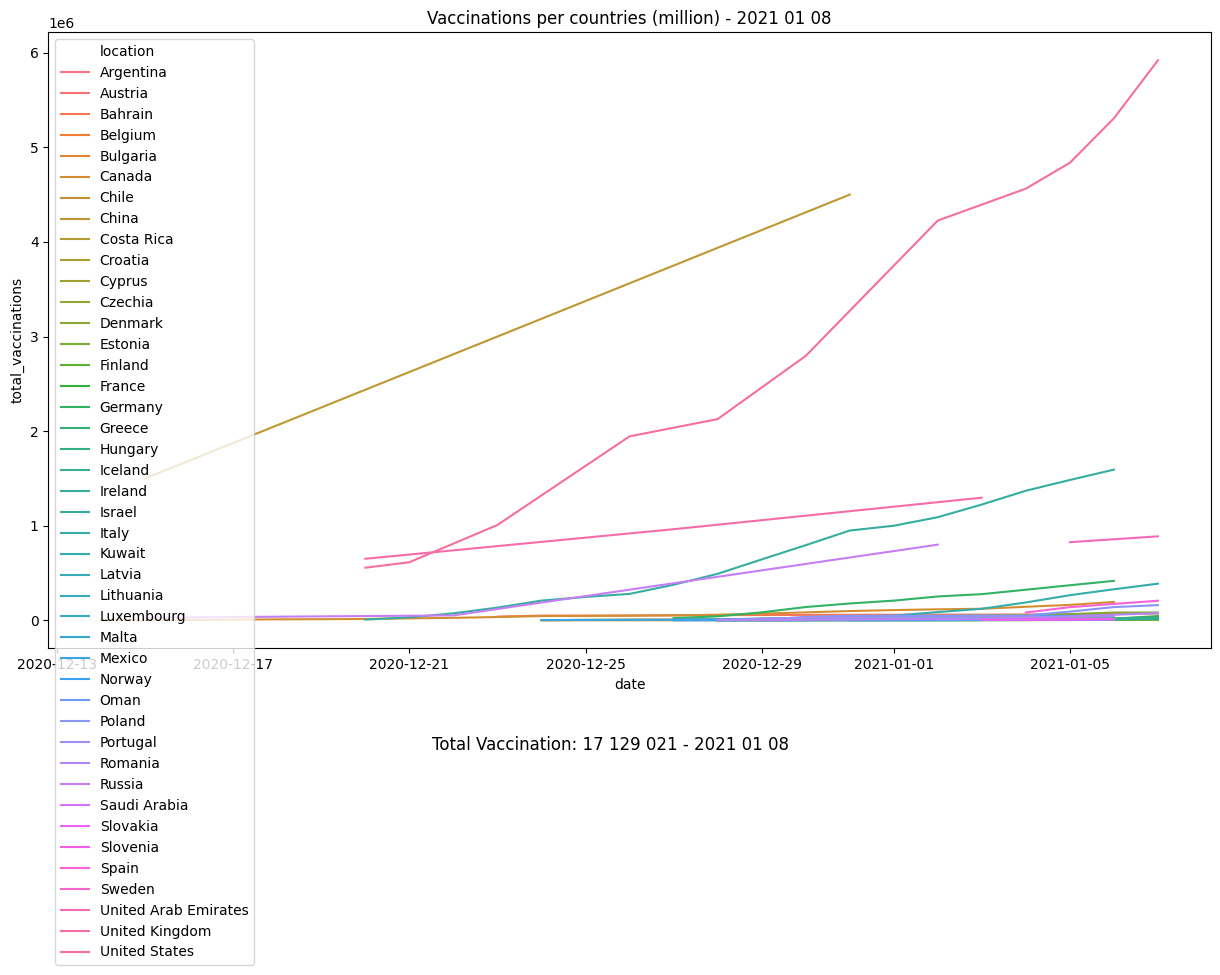

In [10]:
# plot all values = allCountriesFiltered
%matplotlib inline    
import matplotlib.pyplot as plt   
import seaborn as sns
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 8.0)

sns.lineplot(data=allCountriesFiltered, x="date", y="total_vaccinations", hue="location" )
plt.title("Vaccinations per countries (million) - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str  + " - " + start_time.strftime('%Y %m %d'),y=0)

plt.savefig('images/Corona_Line.png',bbox_inches='tight')  
plt.show() 


In [11]:
allCountriesFiltered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 0 to 258
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   location               248 non-null    object        
 1   date                   248 non-null    datetime64[ns]
 2   vaccine                248 non-null    object        
 3   total_vaccinations     248 non-null    int64         
 4   source_url             248 non-null    object        
 5   iso_code               248 non-null    object        
 6   vaccines               248 non-null    object        
 7   last_observation_date  248 non-null    object        
 8   source_name            248 non-null    object        
 9   source_website         248 non-null    object        
 10  _merge                 248 non-null    category      
dtypes: category(1), datetime64[ns](1), int64(1), object(8)
memory usage: 21.7+ KB


In [12]:
# Resample dates Forward filling and sum

#allCountriesFiltered
#grouper = allCountriesFiltered.groupby([pd.Grouper(key="date",freq='1D'), 'location']).mean() 


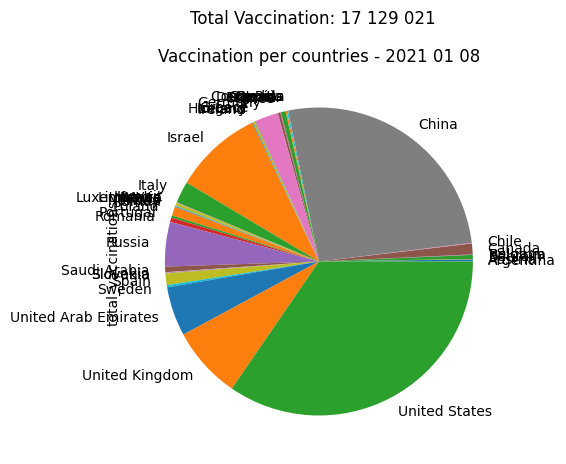

In [13]:
# Plot filtered
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (5, 5)
plotLatestCountries["total_vaccinations"].plot( y='location',kind = 'pie') 
plt.title("Vaccination per countries - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str ,y=1)
plt.savefig('images/Corona_VaccinationperCountry.png')  
plt.show() 


In [14]:
plotLatestCountries.sort_values(by='total_vaccinations',ascending=False)

,total_vaccinations,vaccine,iso_code
location,,,
United States,5919418,"Moderna, Pfizer/BioNTech",USA
China,4500000,"CNBG, Sinovac",CHN
Israel,1593000,Pfizer/BioNTech,ISR
United Kingdom,1296432,Pfizer/BioNTech,GBR
United Arab Emirates,887697,Sinopharm,ARE
Russia,800000,Sputnik V,RUS
Germany,417060,Pfizer/BioNTech,DEU
Italy,387527,Pfizer/BioNTech,ITA
Spain,207323,Pfizer/BioNTech,ESP


In [15]:
plotLatestCountries.shape

(43, 3)

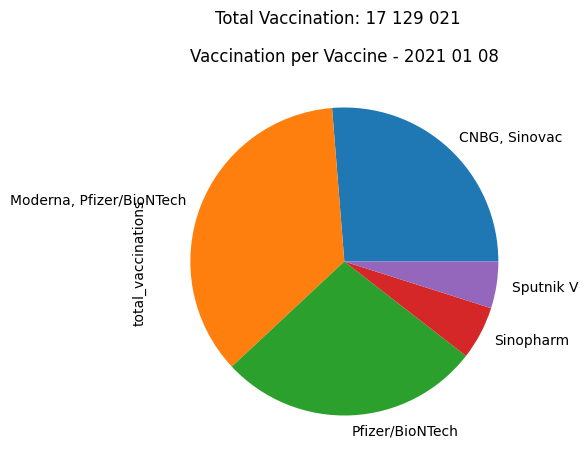

In [16]:
# Vaccine numbers
plotVaccine = plotLatestCountries.groupby('vaccine')['total_vaccinations'].sum()
plotVaccine.plot( kind = 'pie') 
plt.title("Vaccination per Vaccine - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str ,y=1)
plt.savefig('images/Corona_VaccinationperVaccine.png')  
plt.show()

In [17]:
plotVaccine.sort_values(ascending=True)

vaccine
Sputnik V                    839599
Sinopharm                    959936
CNBG, Sinovac               4500000
Pfizer/BioNTech             4715792
Moderna, Pfizer/BioNTech    6113694
Name: total_vaccinations, dtype: int64

In [18]:
# Sweden have 10 000 doses....
#allCountries

In [19]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2021-01-08 02:47:05.675540
Time elapsed (hh:mm:ss.ms) 0:00:15.322018


### Whole dataset
see 
* [COVID-19 Data Processing Pipelines and datasets](https://github.com/covid19-data/covid19-data)

### Compare population
* using data from Wikidata


In [20]:
import sys,json
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"
 
# https://w.wiki/sp8
# see also https://www.wikidata.org/wiki/Wikidata:Project_chat#Brexit_in_Wikidata
queryWD = """SELECT DISTINCT ?cid  (SAMPLE(?continent) AS ?continent)  (SAMPLE(?memberEU) AS ?memberEU) ?country 
(REPLACE(STR(?cid), ".*Q", "Q") AS ?qid) ?population ?ISO3166_1 ?nominalGDPperCapita
?G20 ?IMF (sample(?genderH) AS ?genderH)
WHERE {
  ?cid wdt:P31 wd:Q3624078;
    wdt:P1082 ?population.
  OPTIONAL { ?cid wdt:P298 ?ISO3166_1 }
  OPTIONAL { ?cid wdt:P2132 ?nominalGDPperCapita }
  ?cid wdt:P6/wdt:P21 ?gHead # gender head of gov
  BIND (exists{?cid wdt:P463 wd:Q458} && not exists{?cid p:P463 [ ps:P463 wd:Q458 ; pq:P582 [] ]} AS ?memberEU)
  BIND (exists{?cid wdt:P463 wd:Q19771} && not exists{?cid p:P463 [ ps:P463 wd:Q19771 ; pq:P582 [] ]} AS ?G20)
  BIND (exists{?cid wdt:P463 wd:Q7804} && not exists{?cid p:P463 [ ps:P463 wd:Q7804 ; pq:P582 [] ]} AS ?IMF)
  {?cid wdt:P30 ?contid}
  OPTIONAL {
    ?contid rdfs:label ?continent.
    FILTER((LANG(?continent)) = "en")
    ?cid rdfs:label ?country.
    FILTER((LANG(?country)) = "en")
    ?gHead rdfs:label ?genderH.
    FILTER((LANG(?genderH)) = "en")

  }
FILTER ( ?cid  not in ( wd:Q756617 ) ) #Danish Realm
}
GROUP BY ?population ?countryLabel ?country ?ISO3166_1 ?nominalGDPperCapita ?PPP_GDP_per_capita ?Human_Development_Index ?cid 
 ?G20 ?IMF """


def get_sparql_dataframe(endpoint_url, query):
    """
    Helper function to convert SPARQL results into a Pandas data frame.
    """
    user_agent = "salgo60/%s.%s" % (sys.version_info[0], sys.version_info[1])
 
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()

    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']

    out = []
    for row in processed_results['results']['bindings']:
        item = []
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)

    return pd.DataFrame(out, columns=cols)

WDpopulation = get_sparql_dataframe(endpoint_url, queryWD)
WDpopulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   cid                  194 non-null    object
 1   continent            194 non-null    object
 2   memberEU             194 non-null    object
 3   country              194 non-null    object
 4   qid                  194 non-null    object
 5   population           194 non-null    object
 6   ISO3166_1            194 non-null    object
 7   nominalGDPperCapita  191 non-null    object
 8   G20                  194 non-null    object
 9   IMF                  194 non-null    object
 10  genderH              194 non-null    object
dtypes: object(11)
memory usage: 16.8+ KB


In [21]:
WDpopulation.sample(5)

,cid,continent,memberEU,country,qid,population,ISO3166_1,nominalGDPperCapita,G20,IMF,genderH
17,http://www.wikidata.org/entity/Q697,Oceania,false,Nauru,Q697,13650,NRU,8844,false,false,male
77,http://www.wikidata.org/entity/Q794,Asia,false,Iran,Q794,79966230,IRN,5593,false,false,male
162,http://www.wikidata.org/entity/Q184,Europe,false,Belarus,Q184,9408400,BLR,5733,false,false,male
78,http://www.wikidata.org/entity/Q224,Europe,true,Croatia,Q224,4105493,HRV,13386,false,false,male
68,http://www.wikidata.org/entity/Q145,Europe,false,United Kingdom,Q145,66022273,GBR,39953,true,false,male


In [22]:
plotLatestCountries

,total_vaccinations,vaccine,iso_code
location,,,
Argentina,39599,Sputnik V,ARG
Austria,6000,Pfizer/BioNTech,AUT
Bahrain,72239,Sinopharm,BHR
Belgium,700,Pfizer/BioNTech,BEL
Bulgaria,7913,Pfizer/BioNTech,BGR
Canada,194276,"Moderna, Pfizer/BioNTech",CAN
Chile,10688,Pfizer/BioNTech,CHL
China,4500000,"CNBG, Sinovac",CHN
Costa Rica,2455,Pfizer/BioNTech,CRI


In [23]:
#plotCountriesPopulation = pd.merge(plotLatestCountries, reconciliationCountries,how='outer', left_index=True, right_index=True,indicator=True)   
CountriesData = pd.merge(plotLatestCountries, WDpopulation,how='inner', left_on="iso_code", right_on="ISO3166_1" ,indicator=True)   
CountriesData

,total_vaccinations,vaccine,iso_code,cid,continent,memberEU,country,qid,population,ISO3166_1,nominalGDPperCapita,G20,IMF,genderH,_merge
0,39599,Sputnik V,ARG,http://www.wikidata.org/entity/Q414,South America,false,Argentina,Q414,44938712,ARG,14398,true,false,male,both
1,6000,Pfizer/BioNTech,AUT,http://www.wikidata.org/entity/Q40,Europe,true,Austria,Q40,8809212,AUT,44920,false,false,male,both
2,72239,Sinopharm,BHR,http://www.wikidata.org/entity/Q398,Asia,false,Bahrain,Q398,1492584,BHR,23739,false,false,male,both
3,700,Pfizer/BioNTech,BEL,http://www.wikidata.org/entity/Q31,Europe,true,Belgium,Q31,11431406,BEL,43467,false,false,male,both
4,7913,Pfizer/BioNTech,BGR,http://www.wikidata.org/entity/Q219,Europe,true,Bulgaria,Q219,7000039,BGR,8228,false,false,male,both
5,194276,"Moderna, Pfizer/BioNTech",CAN,http://www.wikidata.org/entity/Q16,North America,false,Canada,Q16,37894799,CAN,44870,true,false,male,both
6,10688,Pfizer/BioNTech,CHL,http://www.wikidata.org/entity/Q298,South America,false,Chile,Q298,18054726,CHL,15346,false,false,male,both
7,4500000,"CNBG, Sinovac",CHN,http://www.wikidata.org/entity/Q148,Asia,false,People's Republic of China,Q148,1409517397,CHN,8826,true,false,male,both
8,2455,Pfizer/BioNTech,CRI,http://www.wikidata.org/entity/Q800,North America,false,Costa Rica,Q800,4905769,CRI,11677,false,false,male,both
9,20603,Pfizer/BioNTech,HRV,http://www.wikidata.org/entity/Q224,Europe,true,Croatia,Q224,4105493,HRV,13386,false,false,male,both


In [24]:
#del CountriesData['country']
#del CountriesData['qid']
#del CountriesData['_merge']

CountriesData['population'] = CountriesData['population'].astype(int)
CountriesData['nominalGDPperCapita'] = CountriesData['nominalGDPperCapita'].astype(float)
CountriesData["memberEU"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['memberEU'] = CountriesData['memberEU'].astype(int)
# G20 IMF
CountriesData["G20"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['G20'] = CountriesData['G20'].astype(int)
CountriesData["IMF"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['IMF'] = CountriesData['IMF'].astype(int)
CountriesData['genderFlag'] = CountriesData['genderH']
CountriesData["genderFlag"].replace({"male": "1", "female": "0"}, inplace=True)
CountriesData['genderFlag'] = CountriesData['genderFlag'].astype(int)

#"Correct United States of America
CountriesData["continent"].replace({"Oceania": "North America"}, inplace=True)
CountriesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 0 to 42
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   total_vaccinations   43 non-null     int64   
 1   vaccine              43 non-null     object  
 2   iso_code             43 non-null     object  
 3   cid                  43 non-null     object  
 4   continent            43 non-null     object  
 5   memberEU             43 non-null     int64   
 6   country              43 non-null     object  
 7   qid                  43 non-null     object  
 8   population           43 non-null     int64   
 9   ISO3166_1            43 non-null     object  
 10  nominalGDPperCapita  43 non-null     float64 
 11  G20                  43 non-null     int64   
 12  IMF                  43 non-null     int64   
 13  genderH              43 non-null     object  
 14  _merge               43 non-null     category
 15  genderFlag           43 n

In [25]:
#CountriesData

In [26]:
CountriesData['Country'] = CountriesData.index

In [27]:
CountriesData["vaccinations_population_percent"] = CountriesData["total_vaccinations"]/CountriesData["population"] * 100

correlations = CountriesData.corr()  
correlations["total_vaccinations"]

total_vaccinations                 1.000000
memberEU                          -0.368535
population                         0.722833
nominalGDPperCapita                0.082120
G20                                0.443302
IMF                               -0.018644
genderFlag                         0.111046
Country                            0.191031
vaccinations_population_percent    0.232436
Name: total_vaccinations, dtype: float64

In [28]:
correlations["vaccinations_population_percent"]

total_vaccinations                 0.232436
memberEU                          -0.324691
population                        -0.047405
nominalGDPperCapita                0.122235
G20                               -0.099981
IMF                               -0.055582
genderFlag                         0.068293
Country                            0.106402
vaccinations_population_percent    1.000000
Name: vaccinations_population_percent, dtype: float64

In [29]:
# see https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
#plt.rcParams['figure.figsize'] = (8.0, 8.0)
#heatmap = sns.heatmap(correlations, vmin=-1, vmax=1, annot=True)
#heatmap.set_title('Corona vaccinations Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


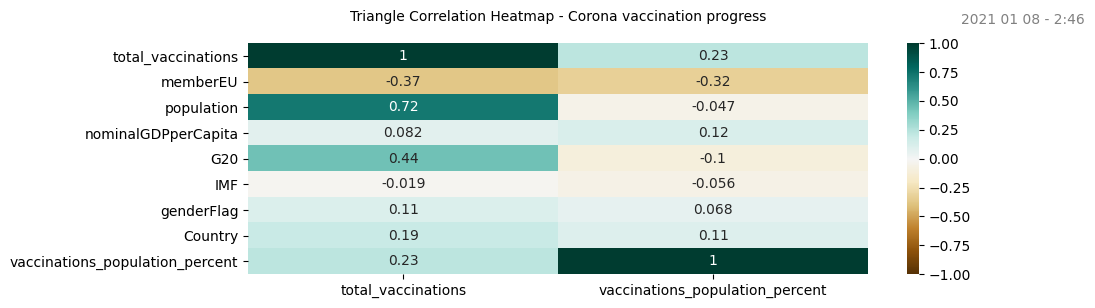

In [30]:
import numpy as np
plt.figure(figsize=(10, 3))
#np.triu(np.ones_like(correlations["total_vaccinations","vaccinations_population_percent"]))
#mask = np.triu(np.ones_like(correlations, dtype=np.bool))
heatmap = sns.heatmap(correlations[{"total_vaccinations","vaccinations_population_percent"}],vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap - Corona vaccination progress', fontdict={'fontsize':10},y=0.9, pad=16);
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M'), fontsize=10,color = 'gray',x=0.9)
plt.savefig('images/Correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show() 


In [31]:
CountriesData = CountriesData.sort_values(by=['vaccinations_population_percent'],ascending=False)
CountriesData[{"total_vaccinations","population","vaccinations_population_percent","continent",
               "memberEU","G20","IMF","country"}]

,vaccinations_population_percent,total_vaccinations,continent,IMF,country,population,G20,memberEU
21,17.518971,1593000,Asia,0,Israel,9093000,0,0
40,9.443439,887697,Asia,0,United Arab Emirates,9400145,0,0
2,4.839862,72239,Asia,0,Bahrain,1492584,0,0
41,1.963628,1296432,Europe,0,United Kingdom,66022273,1,0
42,1.803384,5919418,North America,0,United States of America,328239523,1,0
12,1.416465,82544,Europe,0,Denmark,5827463,0,1
19,1.365355,4875,Europe,0,Iceland,357050,0,0
22,0.642484,387527,Europe,1,Italy,60317000,1,1
37,0.593406,12265,Europe,0,Slovenia,2066880,0,1
34,0.544943,800000,Europe,0,Russia,146804372,1,0


## Vaccination numbers % of population

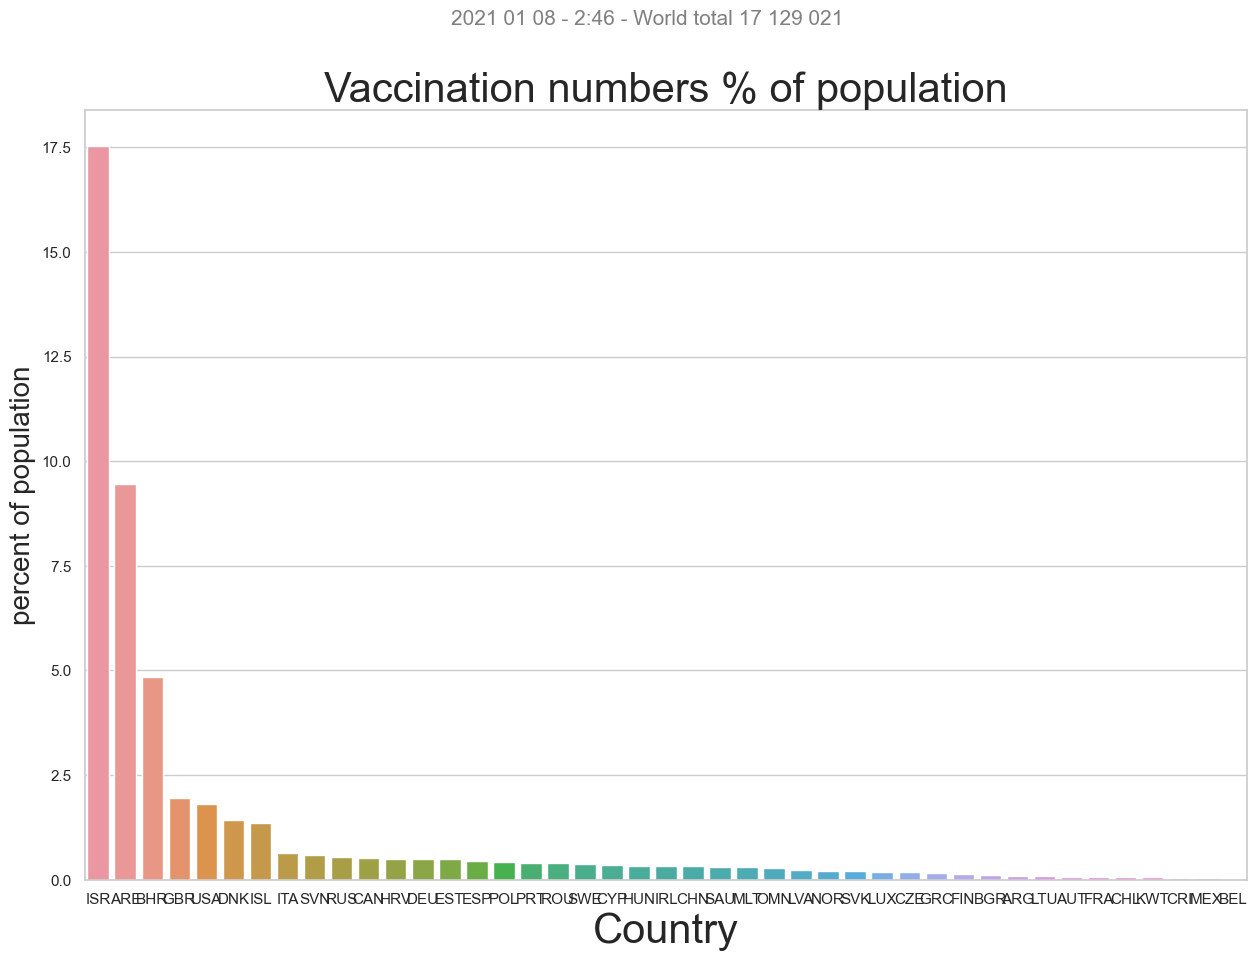

In [32]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData). \
            set_title("Vaccination numbers % of population", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Country",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), fontsize=15,color = 'gray')
plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_2.png",bbox_inches="tight")
plt.show() 

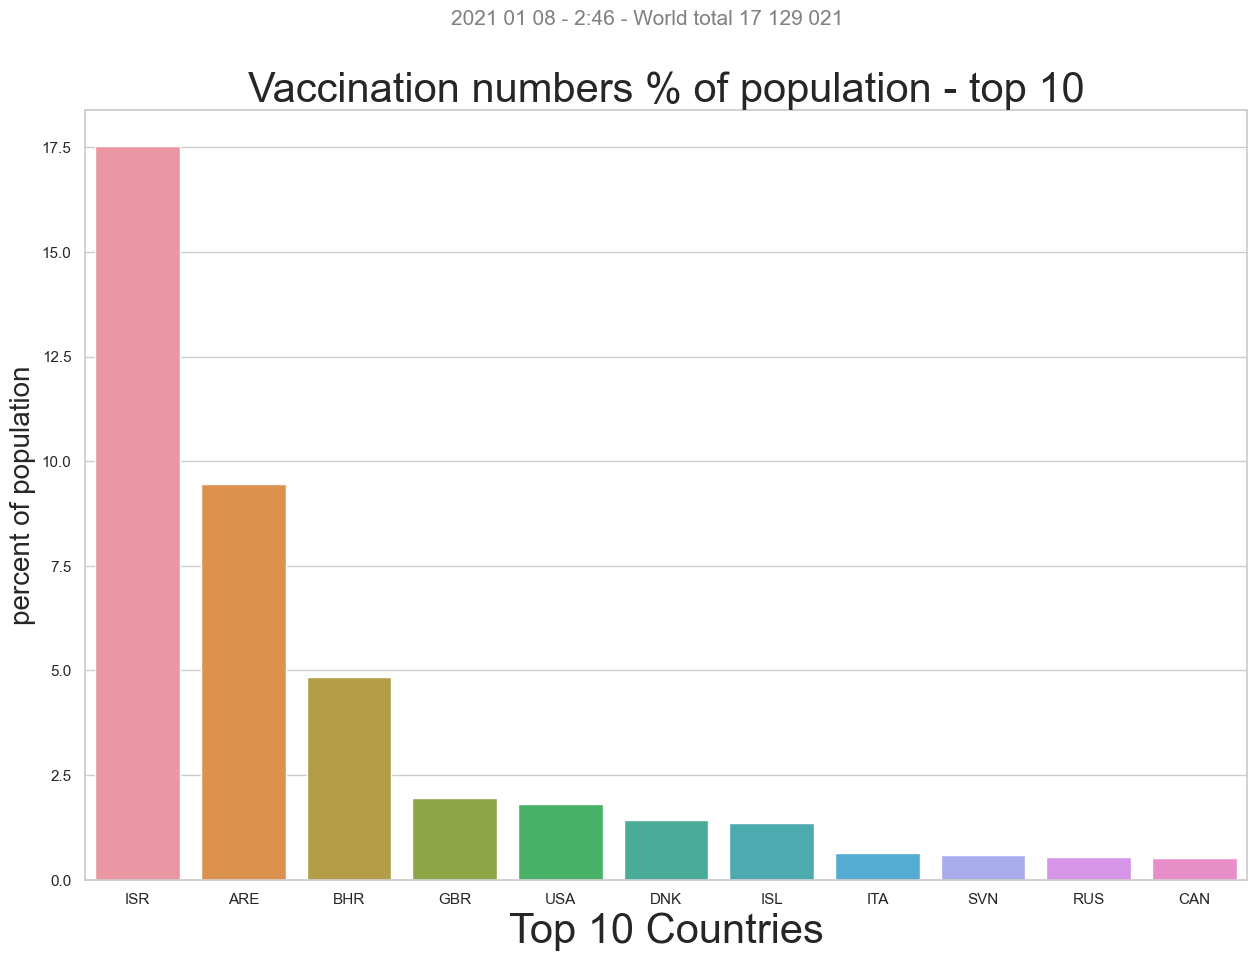

In [33]:
#Top 10 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData[0:11]). \
            set_title("Vaccination numbers % of population - top 10", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Top 10 Countries",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), fontsize=15,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_1_10.png",bbox_inches="tight")
plt.show() 

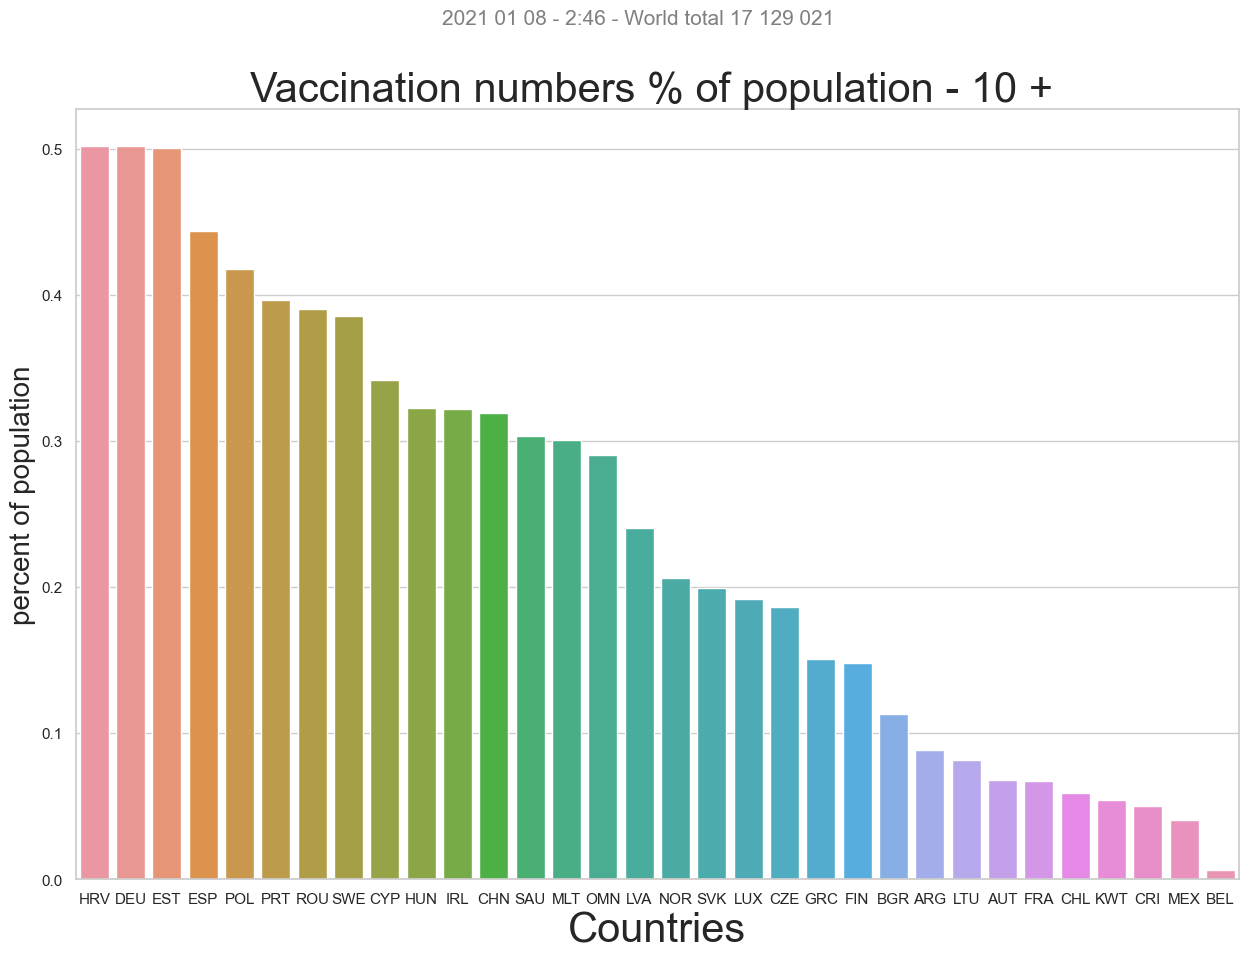

In [34]:
# 10-
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData[11:]). \
            set_title("Vaccination numbers % of population - 10 + ", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Countries",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), fontsize=15,color = 'gray')
plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_10_.png",bbox_inches="tight")
plt.show() 

## Scatter plots

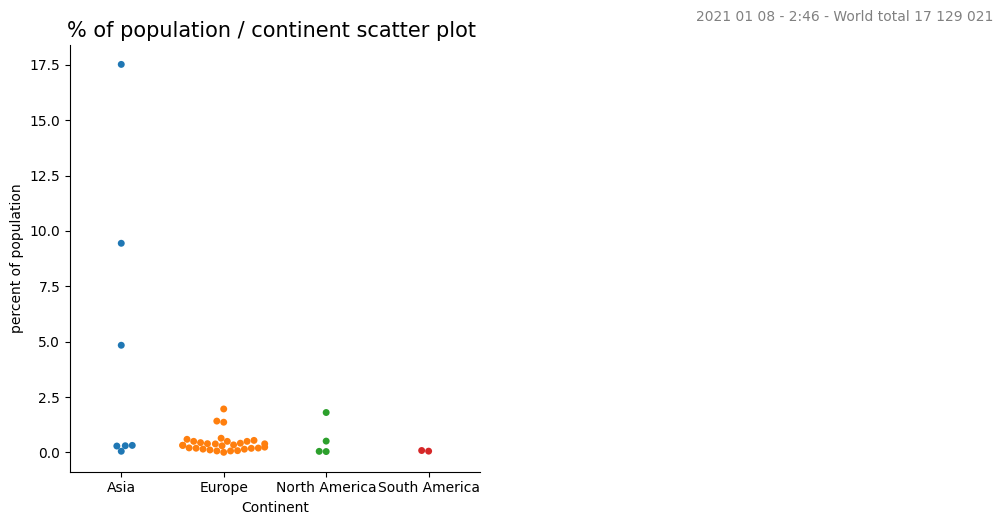

In [35]:
#https://seaborn.pydata.org/tutorial/categorical.html
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="continent", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% of population / continent scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Continent",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

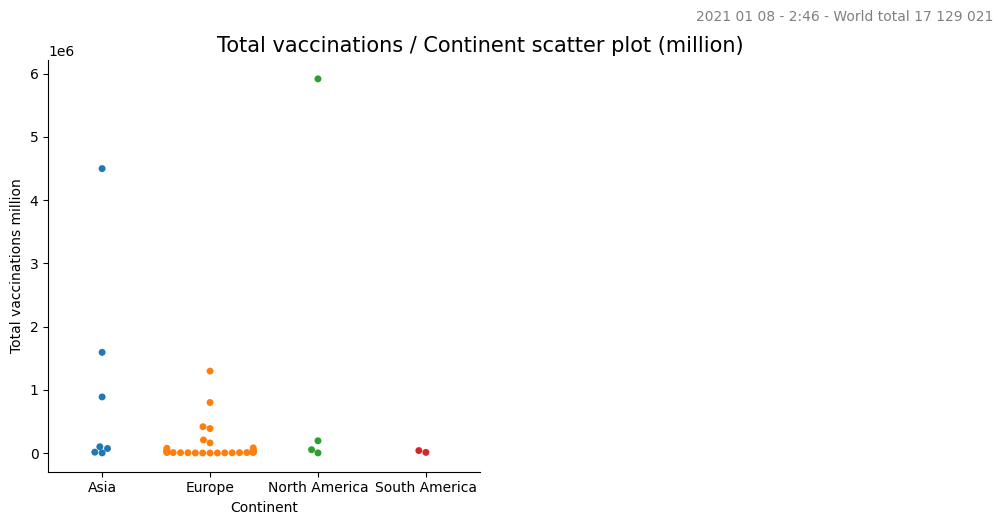

In [36]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="continent", y="total_vaccinations", data=CountriesData,kind="swarm",legend='brief')
plt.title("Total vaccinations / Continent scatter plot (million)" , fontsize=15, x=1,y=1.1 )
plt.ylabel("Total vaccinations million",fontsize=10)
plt.xlabel("Continent",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryTotal_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

In [37]:
CountriesData["Member EU"] = CountriesData["memberEU"]
CountriesData["Member EU"] = CountriesData["Member EU"].astype(str)
CountriesData["Member EU"].replace({"1": "Member in EU", "0": "non Member"}, inplace=True)

#CountriesData

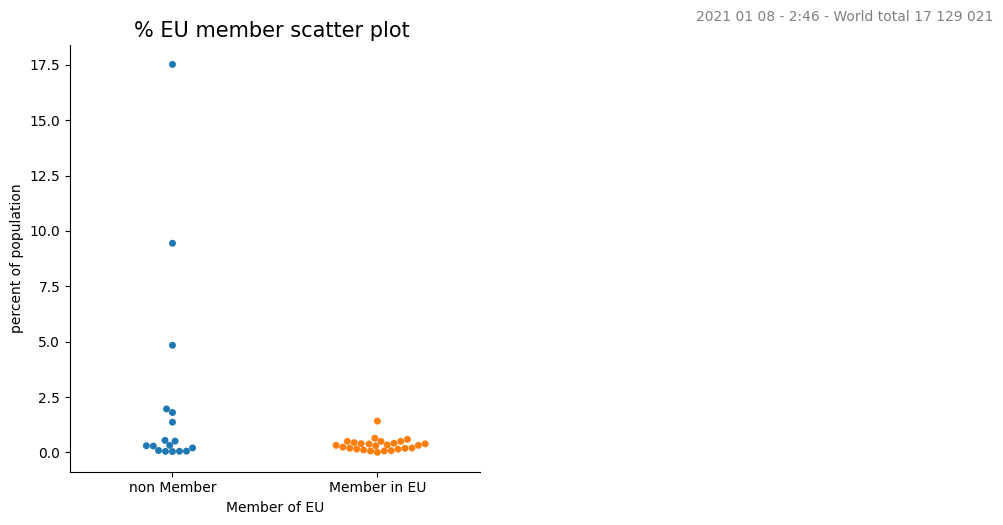

In [38]:

plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member EU", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% EU member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of EU",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_EUCategorical_scatterplot.png",bbox_inches="tight")
plt.show() 

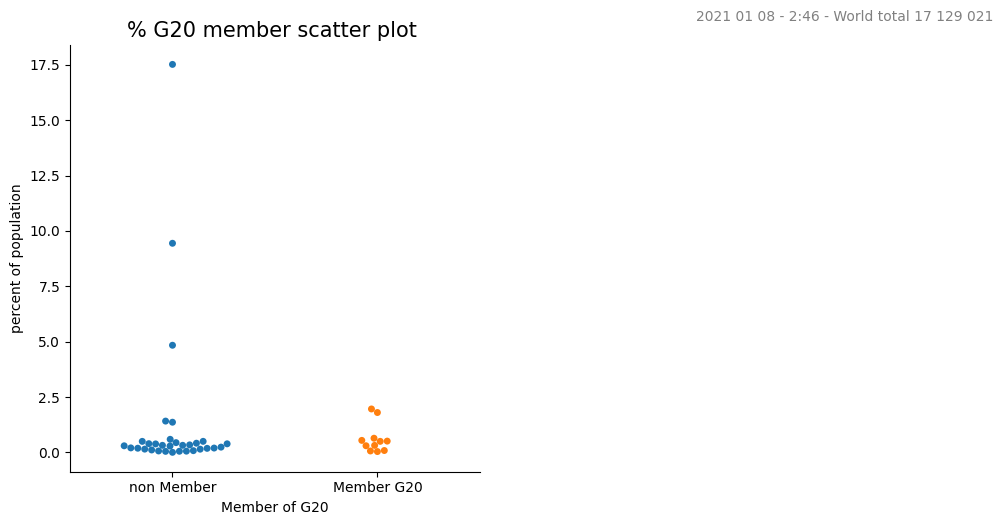

In [39]:
CountriesData["Member G20"] = CountriesData["G20"]
CountriesData["Member G20"] = CountriesData["G20"].astype(str)
CountriesData["Member G20"].replace({"1": "Member G20", "0": "non Member"}, inplace=True)
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member G20", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% G20 member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of G20",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total '  + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_G20_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

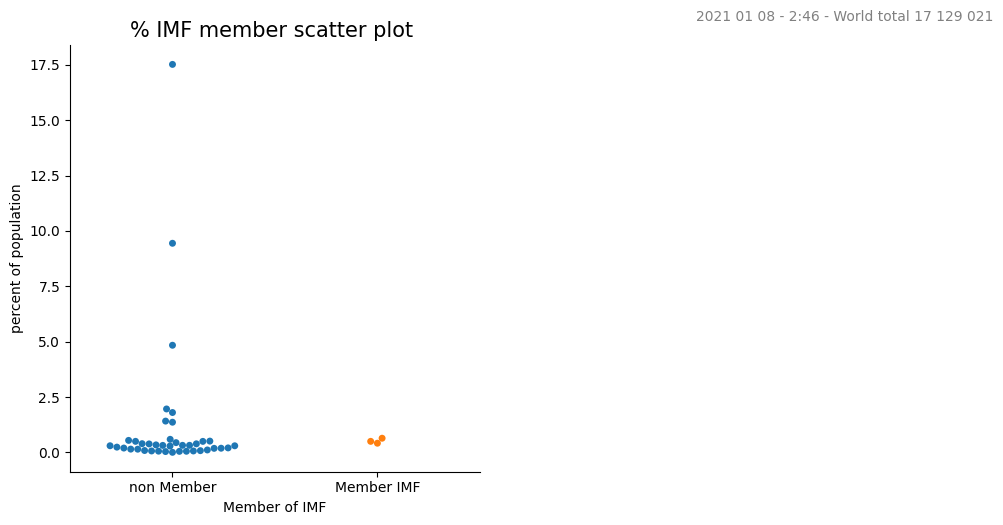

In [40]:
CountriesData["Member IMF"] = CountriesData["IMF"]
CountriesData["Member IMF"] = CountriesData["IMF"].astype(str)
CountriesData["Member IMF"].replace({"1": "Member IMF", "0": "non Member"}, inplace=True)
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member IMF", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% IMF member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of IMF",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_IMF_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

In [41]:
CountriesDataEurope = CountriesData[CountriesData["continent"] == "Europe"]
europetotal_vaccinations_str = europetotal_vaccinations_str = '{:,}'.format(CountriesDataEurope.sum()["total_vaccinations"]).replace(',', ' ')
print(worldtotal_vaccinations_str, plotLatestCountries.shape,europetotal_vaccinations_str)


17 129 021 (43, 3) 3 739 959


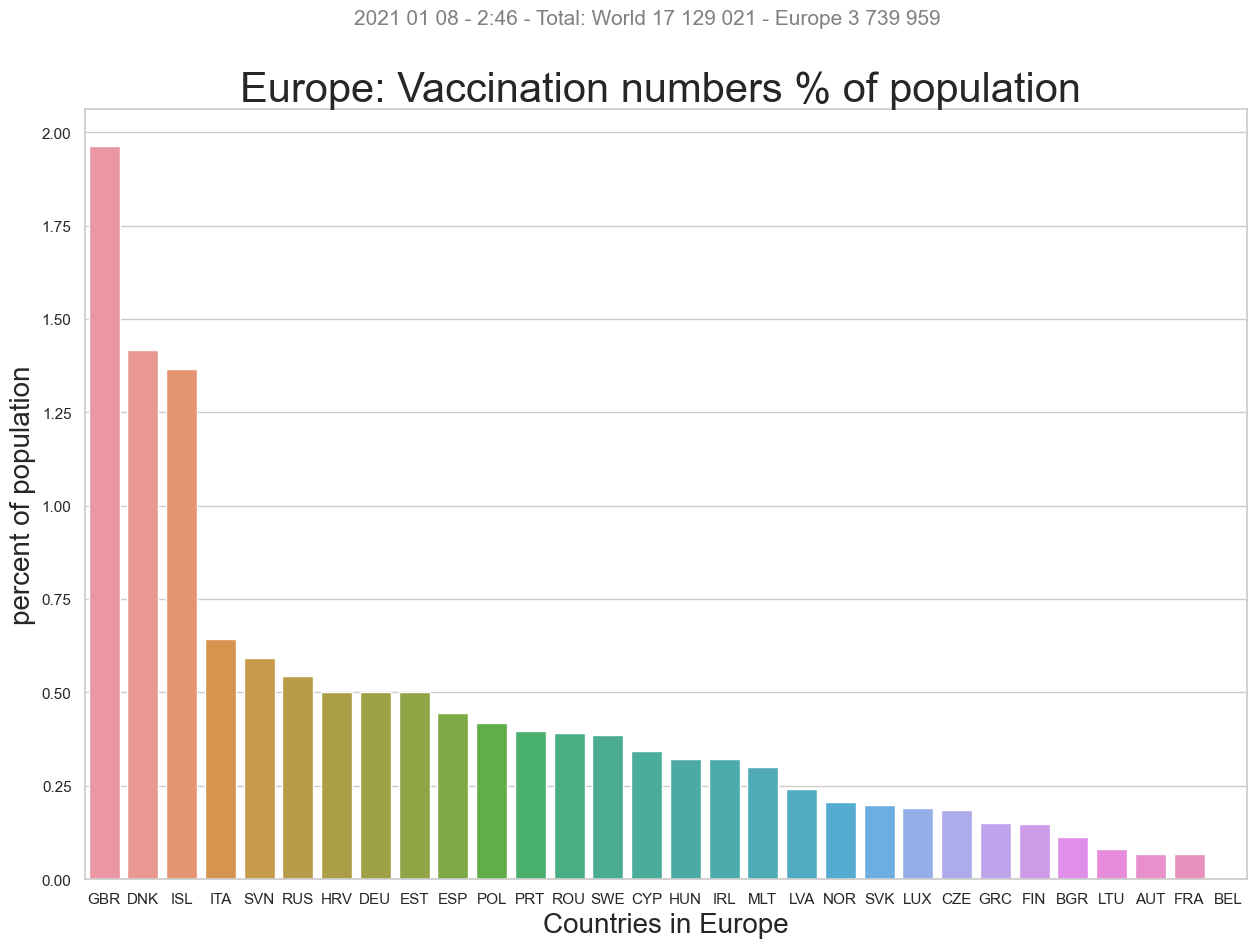

In [42]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesDataEurope). \
            set_title("Europe: Vaccination numbers % of population ", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Countries in Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')
plt.savefig("images/Corona_EuropeVaccinationperCountryPopulation.png",bbox_inches="tight")
plt.show() 

In [43]:
#CountriesDataEurope

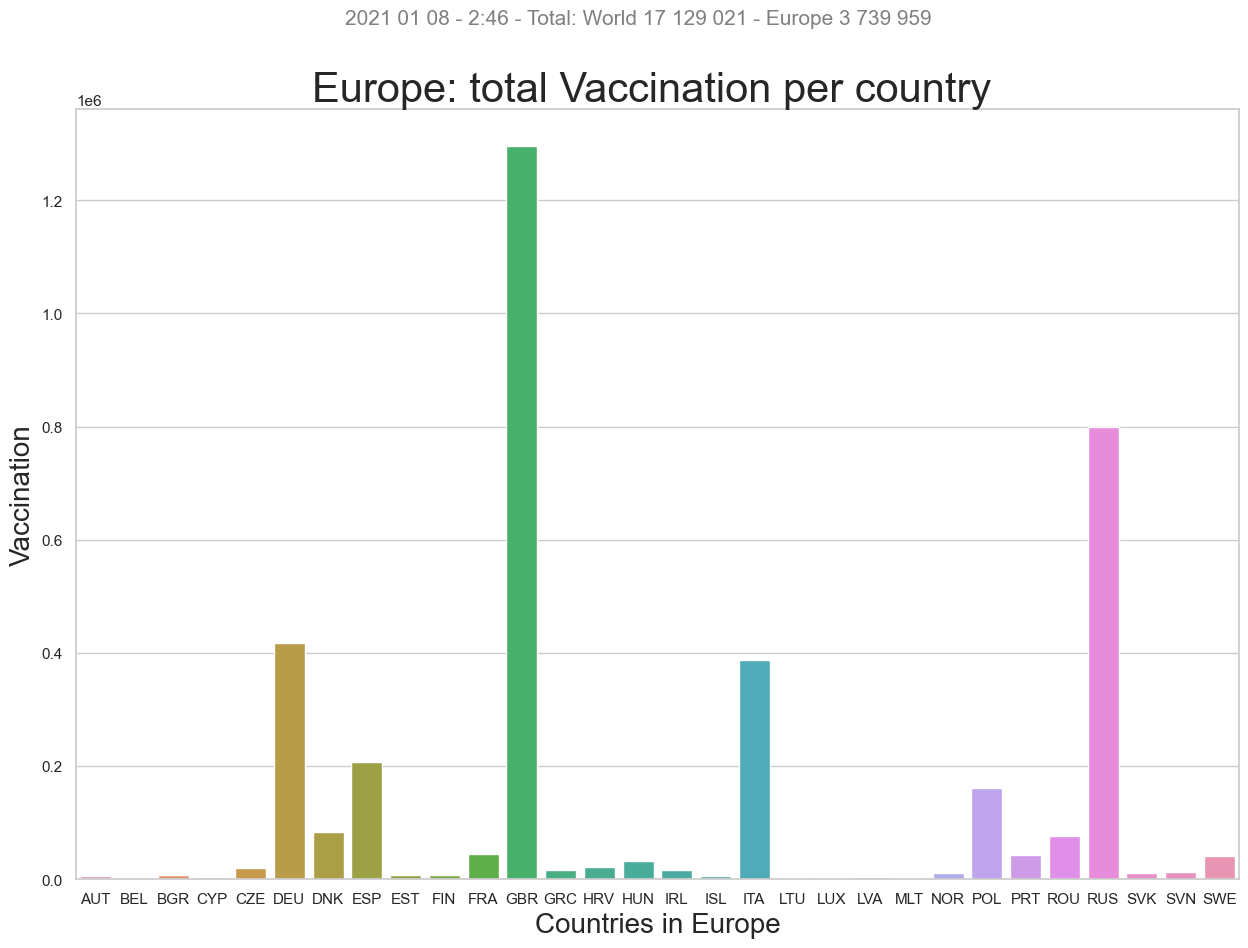

In [44]:
CountriesDataEurope = CountriesDataEurope.sort_values(by=['iso_code'],ascending=True)
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "total_vaccinations", data=CountriesDataEurope). \
            set_title("Europe: total Vaccination per country ", \
                      fontsize=30)
plt.ylabel("Vaccination",fontsize=20)
plt.xlabel("Countries in Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')
plt.savefig("images/Corona_EuropeVaccinationperCountry.png",bbox_inches="tight")
plt.show() 

In [45]:
#All countries Europe also no reporting
WDpopulationEurope = WDpopulation[WDpopulation["continent"] == "Europe"]
 
#CountriesDataEuropeAll = CountriesDataEurope
CountriesDataEuropeAll = pd.merge(WDpopulationEurope,CountriesDataEurope,how='outer',on="ISO3166_1")  
CountriesDataEuropeAll = pd.merge(WDpopulationEurope,CountriesDataEurope,how='outer',on="ISO3166_1") \
        [{"memberEU_x","country_x","ISO3166_1","total_vaccinations","vaccinations_population_percent","genderH_x"}]

CountriesDataEuropeAll['total_vaccinations'] = CountriesDataEuropeAll['total_vaccinations'].fillna(0)
CountriesDataEuropeAll['vaccinations_population_percent'] = CountriesDataEuropeAll['vaccinations_population_percent'].fillna(0)
CountriesDataEuropeAll = CountriesDataEuropeAll.sort_values(by=['ISO3166_1'],ascending=True)
#CountriesDataEuropeAll["Member EU"] = CountriesDataEuropeAll["Member EU"].fillna("non Member")
CountriesDataEuropeAll["memberEU_x"].replace({"true": "Member in EU", "false": "non Member"}, inplace=True)
CountriesDataEuropeAll["memberEU_x"].replace({"true": "Member in EU", "false": "non Member"}, inplace=True)
CountriesDataEuropeAll.rename(columns = {'memberEU_x': 'memberEU'}, inplace = True)
CountriesDataEuropeAll.rename(columns = {'genderH_x': 'head_gender'}, inplace = True)
# name change 
CountriesDataEuropeAll
#CountriesDataEurope
#WDpopulationEurope 
#CountriesDataEurope

,vaccinations_population_percent,head_gender,total_vaccinations,ISO3166_1,memberEU,country_x
36,0.000000,male,0.0,ALB,non Member,Albania
10,0.000000,male,0.0,AND,non Member,Andorra
25,0.000000,male,0.0,ARM,non Member,Armenia
8,0.068111,male,6000.0,AUT,Member in EU,Austria
29,0.000000,male,0.0,AZE,non Member,Azerbaijan
24,0.006123,male,700.0,BEL,Member in EU,Belgium
22,0.113042,male,7913.0,BGR,Member in EU,Bulgaria
32,0.000000,male,0.0,BIH,non Member,Bosnia and Herzegovina
39,0.000000,male,0.0,BLR,non Member,Belarus
3,0.000000,male,0.0,CHE,non Member,Switzerland


## All countries on continent Europe

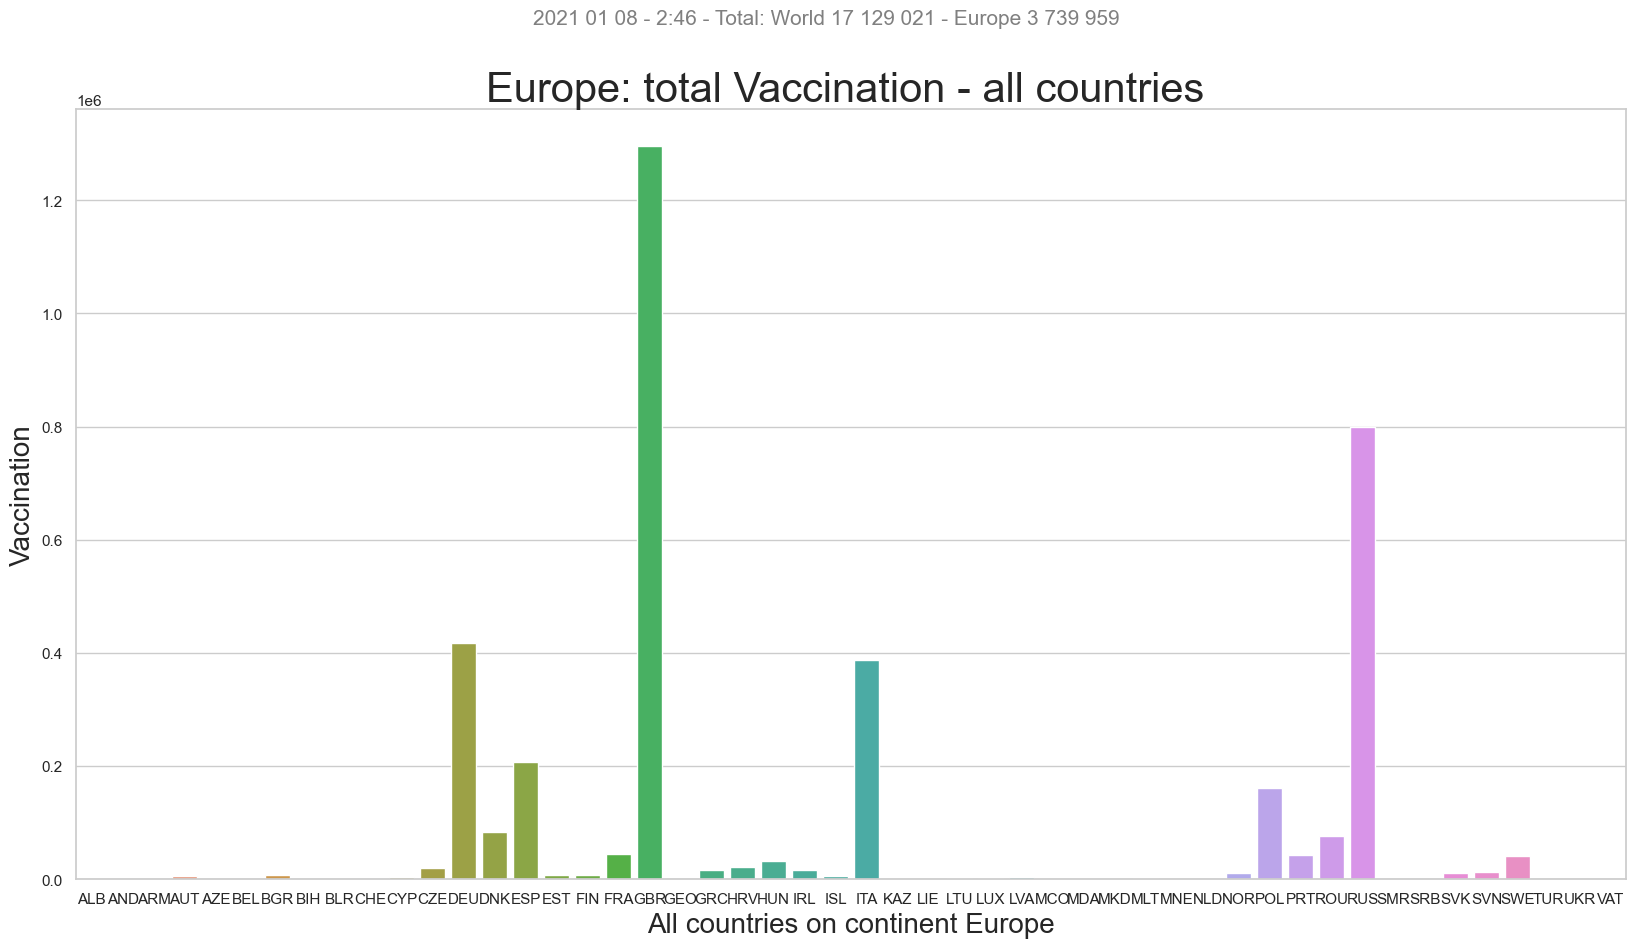

In [46]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "total_vaccinations", data=CountriesDataEuropeAll). \
            set_title("Europe: total Vaccination - all countries ", \
                      fontsize=30)
plt.ylabel("Vaccination",fontsize=20)
plt.xlabel("All countries on continent Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')

plt.savefig("images/Corona_EuropeAllVaccinationperCountry.png",bbox_inches="tight")
plt.show() 

In [47]:
CountriesDataEuropeAll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 36 to 12
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   vaccinations_population_percent  50 non-null     float64
 1   head_gender                      50 non-null     object 
 2   total_vaccinations               50 non-null     float64
 3   ISO3166_1                        50 non-null     object 
 4   memberEU                         50 non-null     object 
 5   country_x                        50 non-null     object 
dtypes: float64(2), object(4)
memory usage: 5.2+ KB


In [48]:
CountriesDataEuropeAll


,vaccinations_population_percent,head_gender,total_vaccinations,ISO3166_1,memberEU,country_x
36,0.000000,male,0.0,ALB,non Member,Albania
10,0.000000,male,0.0,AND,non Member,Andorra
25,0.000000,male,0.0,ARM,non Member,Armenia
8,0.068111,male,6000.0,AUT,Member in EU,Austria
29,0.000000,male,0.0,AZE,non Member,Azerbaijan
24,0.006123,male,700.0,BEL,Member in EU,Belgium
22,0.113042,male,7913.0,BGR,Member in EU,Bulgaria
32,0.000000,male,0.0,BIH,non Member,Bosnia and Herzegovina
39,0.000000,male,0.0,BLR,non Member,Belarus
3,0.000000,male,0.0,CHE,non Member,Switzerland


### Countries in EU

In [49]:
#CountriesDataEuropeEU[CountriesDataEuropeEU["ISO3166_1"] == "RUS"]
#CountriesDataEuropeEU
CountriesDataEuropeAll.rename(columns = {'country_x': 'country'}, inplace = True)
CountriesDataEuropeAll.rename(columns = {'ISO3166_1': 'ISO3166-1'}, inplace = True)

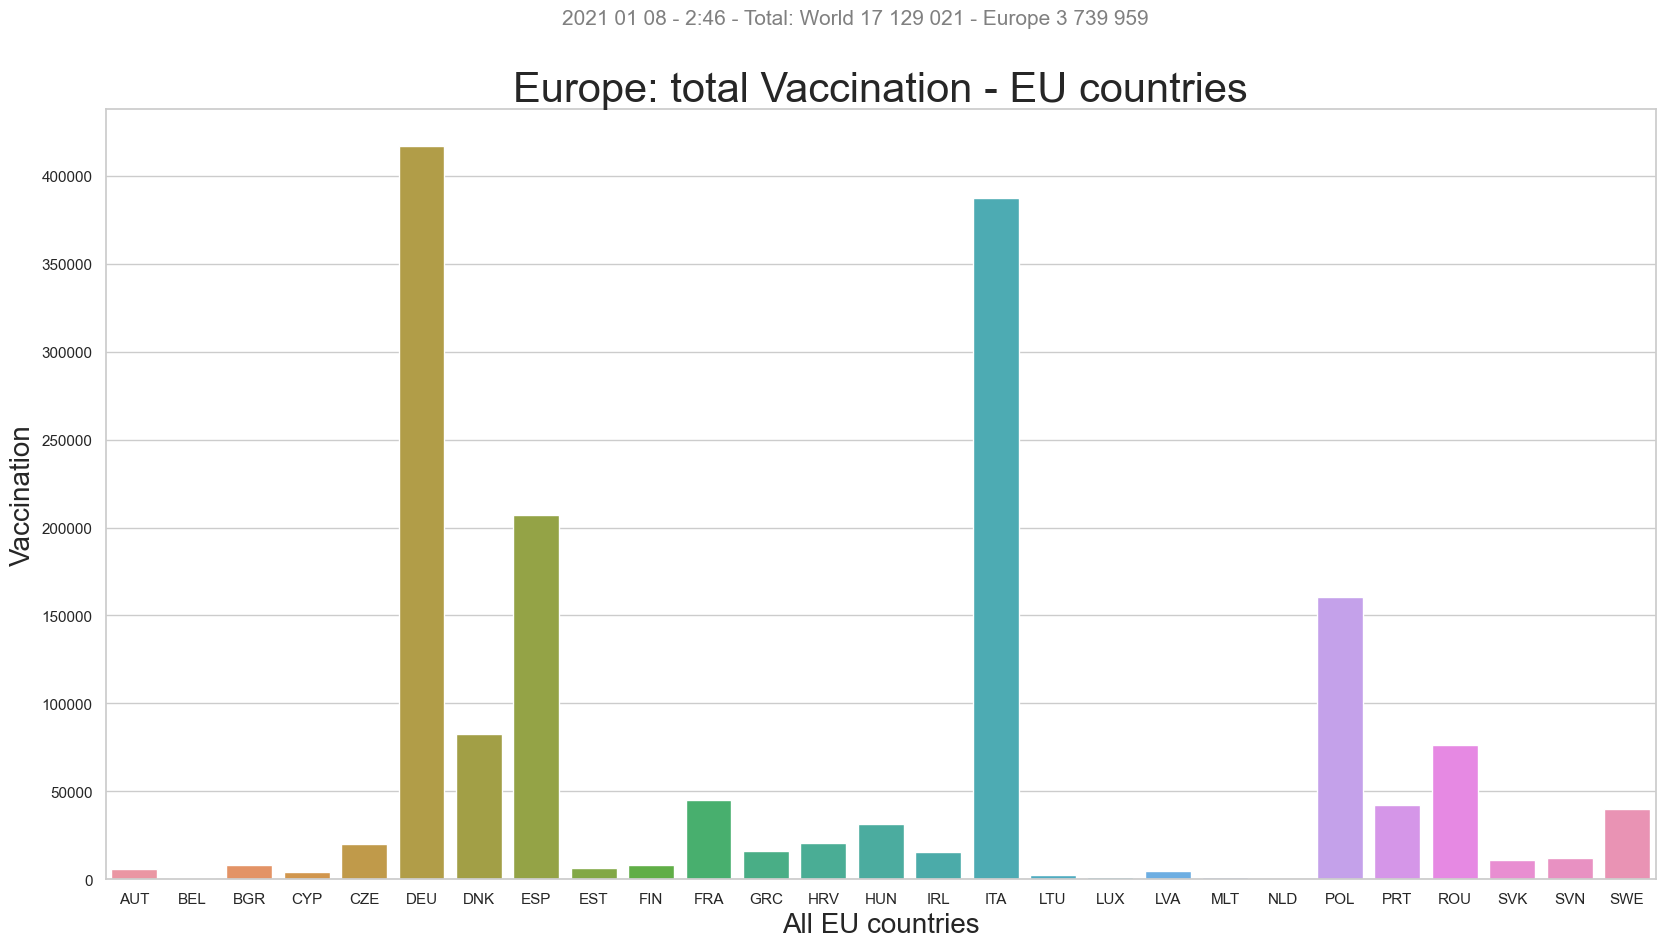

In [50]:
CountriesDataEuropeEU = CountriesDataEuropeAll[CountriesDataEuropeAll["memberEU"] == "Member in EU"]

plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166-1",y = "total_vaccinations", data=CountriesDataEuropeEU). \
            set_title("Europe: total Vaccination - EU countries", \
                      fontsize=30)
plt.ylabel("Vaccination",fontsize=20)
plt.xlabel("All EU countries",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')
#plt.annotate('actual group', xy=(x+0.2,y), xytext=(x+0.3, 300),
#             arrowprops=dict(facecolor='black', shrink=0.05, headwidth=20, width=7))
#for p in ax.patches:
#    print(p)

plt.savefig("images/EU_VaccinationperCountry.png",bbox_inches="tight")
plt.show()

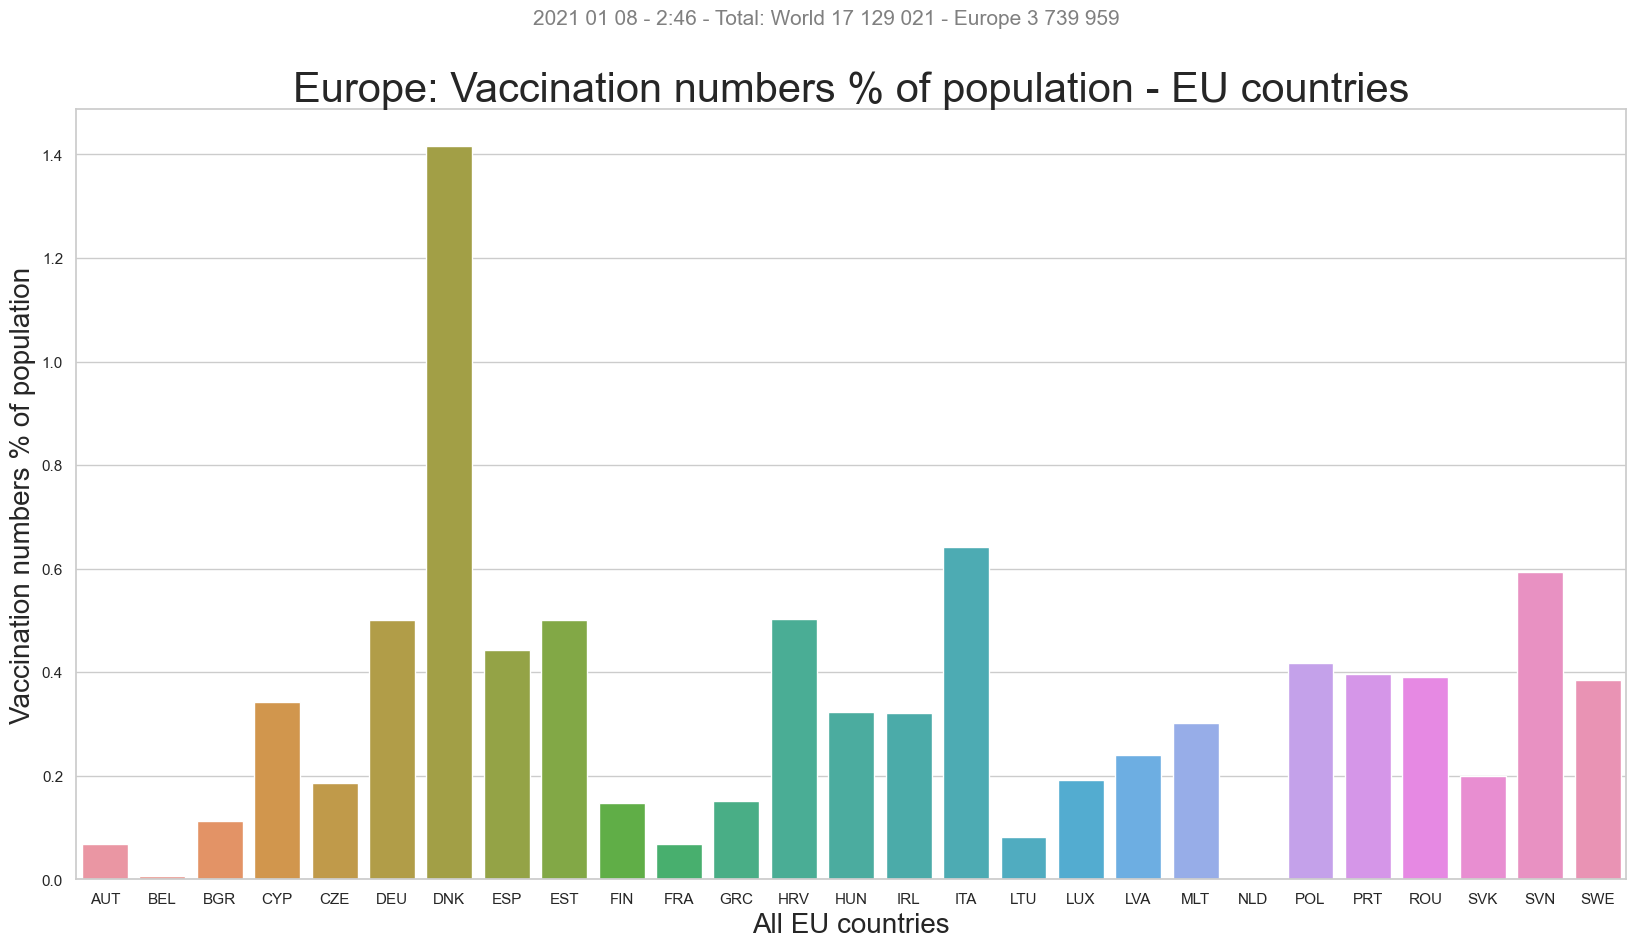

In [51]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)

sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166-1",y = "vaccinations_population_percent", data=CountriesDataEuropeEU). \
            set_title("Europe: Vaccination numbers % of population - EU countries", \
                      fontsize=30)
style = dict(size=10, color='gray')

plt.ylabel("Vaccination numbers % of population",fontsize=20)
plt.xlabel("All EU countries",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')

plt.savefig("images/EU_PercentVaccinationperCountry.png",bbox_inches="tight")
plt.show()

In [52]:
CountriesDataEuropeEU
#WDpopulationEuropeEU

,vaccinations_population_percent,head_gender,total_vaccinations,ISO3166-1,memberEU,country
8,0.068111,male,6000.0,AUT,Member in EU,Austria
24,0.006123,male,700.0,BEL,Member in EU,Belgium
22,0.113042,male,7913.0,BGR,Member in EU,Bulgaria
37,0.341843,male,3901.0,CYP,Member in EU,Cyprus
42,0.186255,male,19918.0,CZE,Member in EU,Czech Republic
31,0.501580,female,417060.0,DEU,Member in EU,Germany
14,1.416465,female,82544.0,DNK,Member in EU,Denmark
0,0.443633,male,207323.0,ESP,Member in EU,Spain
44,0.500596,male,6632.0,EST,Member in EU,Estonia
9,0.148245,female,8155.0,FIN,Member in EU,Finland


### Countries in EU not delivering Vaccination statistics

In [53]:
CountriesDataEuropeAll[(CountriesDataEuropeAll["memberEU"] == "Member in EU") & \
(CountriesDataEuropeAll["total_vaccinations"] == 0 )][{"total_vaccinations","country","ISO3166-1","memberEU"}]

,total_vaccinations,ISO3166-1,country,memberEU
1,0.0,NLD,Kingdom of the Netherlands,Member in EU


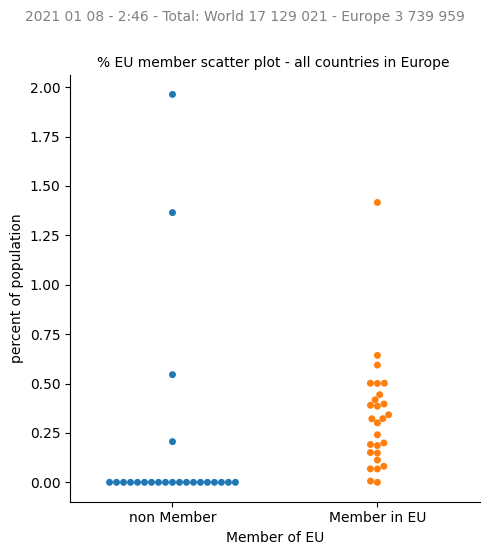

In [54]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="memberEU", y="vaccinations_population_percent", data=CountriesDataEuropeAll,kind="swarm",legend='brief')
plt.title("% EU member scatter plot - all countries in Europe ",fontsize=10)
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of EU",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=10,color = 'gray', y=1.1)

plt.savefig("images/Corona_VaccinationperPopulation_AllEurope_scatterplot.png",bbox_inches="tight")
plt.show() 

In [55]:
#CountriesDataEuropeAll["head_gender"].astype('string')  
CountriesDataEuropeAll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 36 to 12
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   vaccinations_population_percent  50 non-null     float64
 1   head_gender                      50 non-null     object 
 2   total_vaccinations               50 non-null     float64
 3   ISO3166-1                        50 non-null     object 
 4   memberEU                         50 non-null     object 
 5   country                          50 non-null     object 
dtypes: float64(2), object(4)
memory usage: 5.2+ KB


In [56]:
#CountriesDataEuropeAll["vaccinations_population_percent].value_counts()

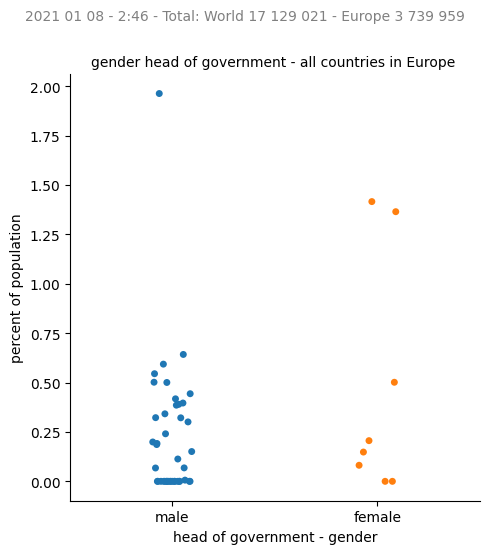

In [57]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="head_gender", y="vaccinations_population_percent", data=CountriesDataEuropeAll)
plt.title("gender head of government - all countries in Europe ",fontsize=10)
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("head of government - gender",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=10,color = 'gray', y=1.1)

plt.savefig("images/Corona_AllEurope_percent_gender_scatterplot.png",bbox_inches="tight")
plt.show() 

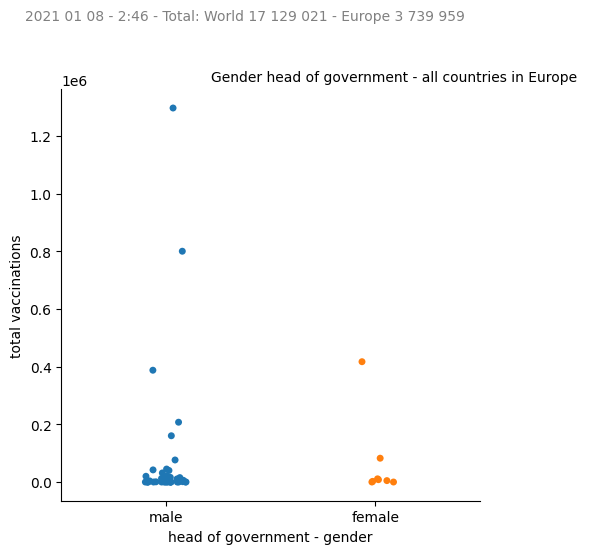

In [58]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="head_gender", y="total_vaccinations", data=CountriesDataEuropeAll)
plt.title("Gender head of government - all countries in Europe ",fontsize=10,x=0.8)
plt.ylabel("total vaccinations",fontsize=10)
plt.xlabel("head of government - gender",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=10,color = 'gray', y=1.1)

plt.savefig("images/Corona_AllEurope_gender_scatterplot.png",bbox_inches="tight")
plt.show() 

In [59]:
print(worldtotal_vaccinations_str, plotLatestCountries.shape, europetotal_vaccinations_str, CountriesDataEurope.shape)

17 129 021 (43, 3) 3 739 959 (30, 21)


In [60]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2021-01-08 02:47:28.439232
Time elapsed (hh:mm:ss.ms) 0:00:38.074025


In [61]:
#The Global State of Democracy Indices
#stata_democracy_indices = "https://www.idea.int/gsod-indices/sites/default/files/gsodi_pv_4.dta"
#df = pd.read_stata(stata_democracy_indices)